# **Credit Churn Customer Classification**

Sebuah perusahaan ingin meningkatkan layanan dan mempertahnkan pelanggannya agar tidak berhenti berlangganan. Runtutan proses dibawah ini dibuat untuk menganalisa ciri atau gambaran seperti apa pelanggan yang akan churn dan tidak sekaligus membuat modelnya untuk memprediksi kemungkinan pelanggan akan churn di masa mendatang.

Akan dibuat dua model yaitu XGBoost dan Gradient Boost yang akan dipertimbangkan hasilnya mana yang akan digunakan. Selain itu pada tahap pre-proses juga melewati pengecekkan missing value sekaligus menghapus jika ada, membuat data turunan, hingga pipeline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Credit Card Churn - Dataset.csv')
pd.set_option('display.max_columns', None)
df.head(25)

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,719455083,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
5,778247358,0,65,M,1,Graduate,Single,Less than $40K,Blue,56,5,3,2,7636.0,0,7636.0,0.801,3880,67,0.811,0.000
6,710431158,0,52,F,3,Unknown,Single,Unknown,Blue,36,3,1,2,10273.0,1657,8616.0,0.710,3778,70,0.591,0.161
7,715252383,0,58,F,2,High School,Divorced,Unknown,Gold,36,5,4,3,34516.0,1864,32652.0,0.664,3595,52,0.733,0.054
8,717189183,0,35,M,1,Doctorate,Single,$40K - $60K,Blue,24,6,3,2,10467.0,1961,8506.0,0.713,2665,65,0.667,0.187
9,712050933,1,48,M,4,College,Married,$80K - $120K,Blue,32,5,2,3,25190.0,0,25190.0,0.467,1533,41,0.323,0.000




---

# **EDA (Explore Data Analysis)**

In [ ]:
df.isnull().sum()

client_id                       0
label                           0
usia                            0
gender                          0
jumlah_tanggungan               0
pendidikan                      0
status_nikah                    0
penghasilan_tahunan             0
tipe_kartu_kredit               0
lama_nasabah                    0
jumlah_produk                   0
bulan_nonactive                 0
jumlah_kontak                   0
total_limit_kredit              0
total_limit_kredit_dipakai      0
sisa_limit_kredit               0
rasio_transaksi_Q4_Q1           0
total_transaksi                 0
jumlah_transaksi                0
rasio_jumlah_transaksi_Q4_Q1    0
rasio_pemakaian                 0
dtype: int64

In [ ]:
df['label'].value_counts()

label
0    4200
1     800
Name: count, dtype: int64

<Axes: xlabel='label'>

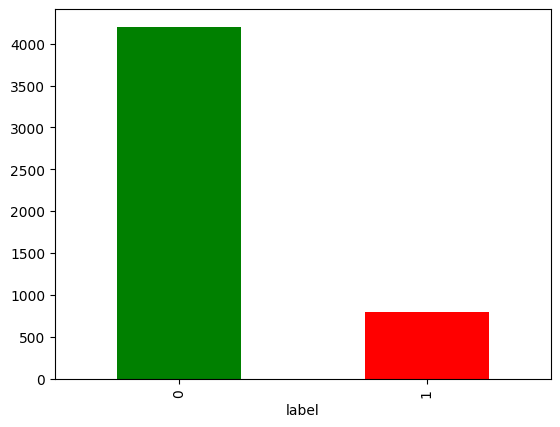

In [ ]:
df['label'].value_counts().plot(kind='bar',color=['g','r'])

bar yang mewakili pelanggan churn (label 1) jauh lebih tinggi dibandingkan dengan bar pelanggan yang tidak churn (label 0). Hal ini menunjukkan bahwa sebagian besar pelanggan dalam dataset ini cenderung churn.

Ketimpangan data ini, di mana jumlah pelanggan churn (label 1) jauh lebih banyak dibandingkan pelanggan yang tidak churn (label 0), menunjukkan adanya masalah ketidakseimbangan data (class imbalance). Hal ini dapat mempengaruhi hasil analisis dan model prediktif yang akan kita buat

**Distribusi Usia Customer**

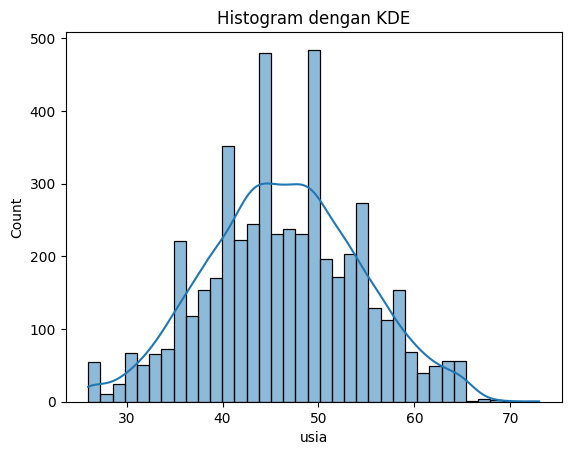

In [ ]:
sns.histplot(df['usia'], kde=True)
plt.title('Histogram dengan KDE')
plt.show()

Ada dua puncak utama dalam distribusi usia, yang menunjukkan bahwa ada dua kelompok usia yang dominan, yaitu sekitar usia 40 tahun dan 50 tahun. Ini menunjukkan bahwa sebagian besar customer berada di rentang usia tersebut.

data terkonsentrasi pada usia 30 - 60 tahun

Distribusi usia tampak cukup simetris, meskipun ada sedikit skew ke arah usia yang lebih tinggi (kanan).

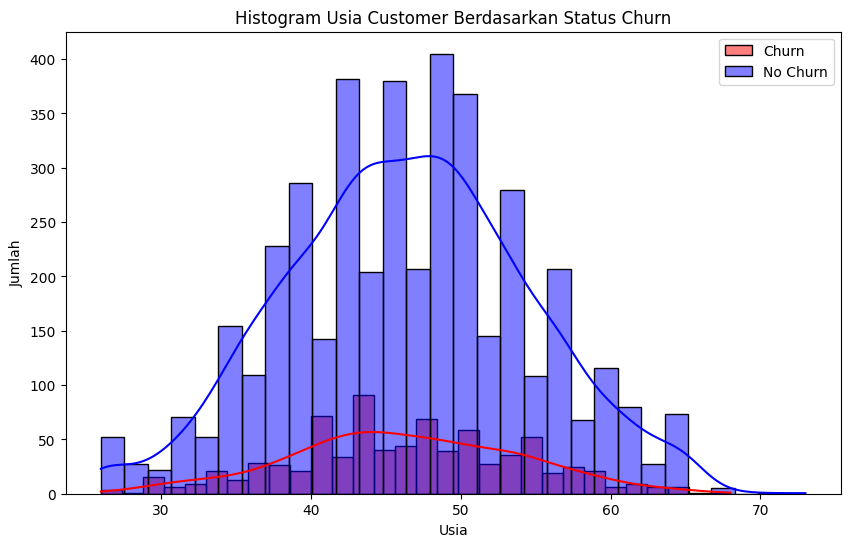

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 1]['usia'], kde=True, color='red', label='Churn', bins=30, alpha=0.5)
sns.histplot(df[df['label'] == 0]['usia'], kde=True, color='blue', label='No Churn', bins=30, alpha=0.5)
plt.title('Histogram Usia Customer Berdasarkan Status Churn')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

Ternyata, pada usia 40 - 50 tahun terjadi lonjakan churn. lonjakan ini sebanding dengan dominansi usia pada plot sebelumnya.

**Data customer dengan rentang usia 40 - 55 tahun**

In [ ]:
usiaChurn = df.copy()
usiaChurn = usiaChurn.loc[(df['usia'] >= 40) & (df['usia'] <= 55)]
usiaChurn

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,719455083,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
3,711264033,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
6,710431158,0,52,F,3,Unknown,Single,Unknown,Blue,36,3,1,2,10273.0,1657,8616.0,0.710,3778,70,0.591,0.161
9,712050933,1,48,M,4,College,Married,$80K - $120K,Blue,32,5,2,3,25190.0,0,25190.0,0.467,1533,41,0.323,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,710937783,0,53,F,0,Uneducated,Married,$40K - $60K,Blue,40,1,3,3,2772.0,2414,358.0,0.805,5313,68,1.194,0.871
4995,708504783,0,47,M,3,Uneducated,Unknown,$40K - $60K,Blue,36,3,3,3,10960.0,1333,9627.0,0.678,3480,62,0.632,0.122
4996,709249083,1,40,M,2,Unknown,Single,$60K - $80K,Blue,20,4,2,4,4283.0,0,4283.0,0.878,8672,64,1.207,0.000
4997,713144208,1,51,F,0,High School,Married,Unknown,Blue,42,1,4,4,9989.0,568,9421.0,0.520,2053,49,0.485,0.057


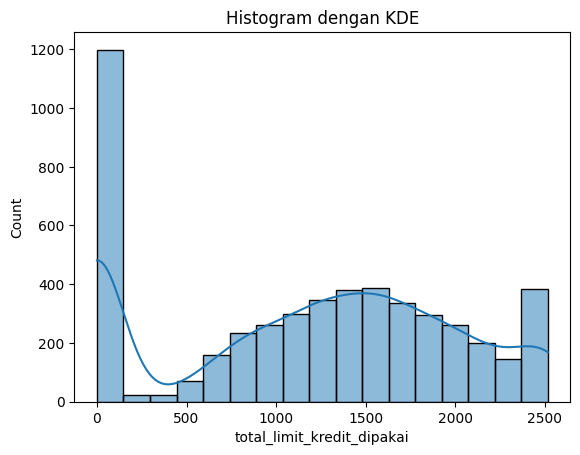

In [ ]:
sns.histplot(df['total_limit_kredit_dipakai'], kde=True)
plt.title('Histogram dengan KDE')
plt.show()

Text(0, 0.5, 'Count')

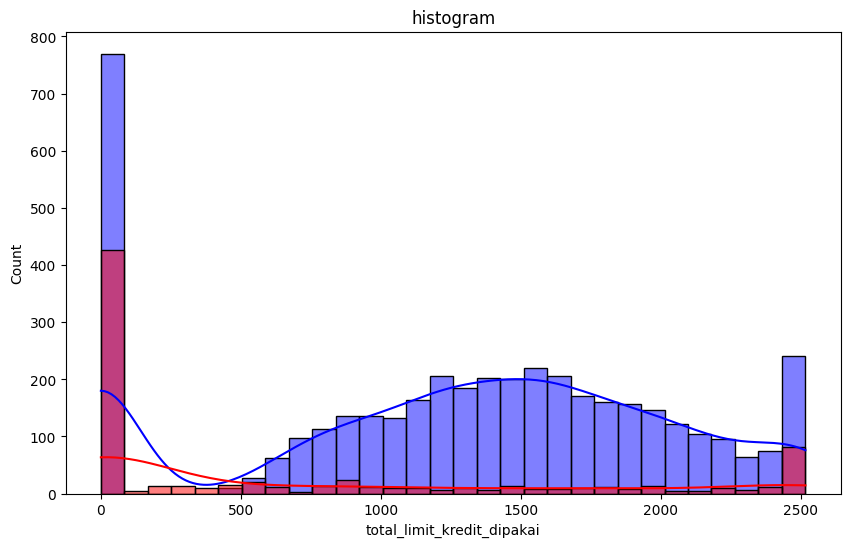

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 0]['total_limit_kredit_dipakai'],color = 'blue', kde=True, bins=30)
sns.histplot(df[df['label'] == 1]['total_limit_kredit_dipakai'], color = 'red',kde=True, bins=30)
plt.title('histogram')
plt.xlabel('total_limit_kredit_dipakai')
plt.ylabel('Count')

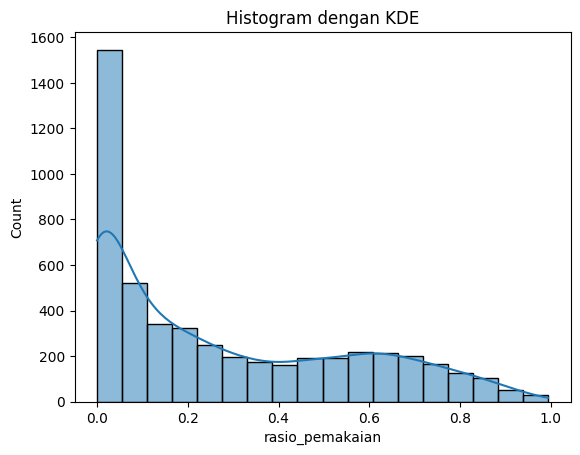

In [ ]:
sns.histplot(df['rasio_pemakaian'],kde=True)
plt.title('Histogram dengan KDE')
plt.show()

Mayoritas pelanggan memiliki rasio pemakaian yang rendah. terlihat dari puncak histogram di dekat 0.0 yang menunjukkan banyak pelanggan yang hampir tidak menggunakan limit kredit mereka.

Semakin tinggi rasio pemakaian, semakin sedikit jumlah pelanggan.terlihat dari penurunan jumlah pelanggan seiring dengan meningkatnya rasio pemakaian.

Text(0, 0.5, 'Count')

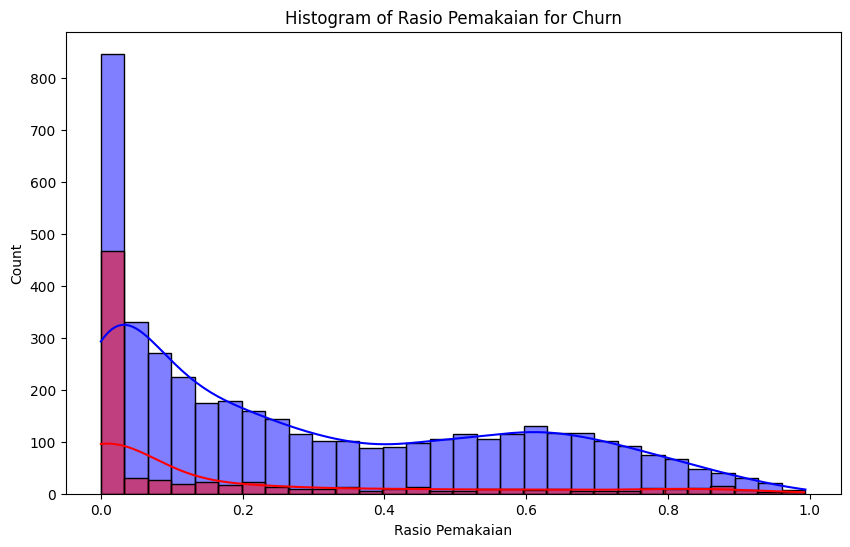

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 0]['rasio_pemakaian'],color = 'blue', kde=True, bins=30)
sns.histplot(df[df['label'] == 1]['rasio_pemakaian'], color = 'red',kde=True, bins=30)
plt.title('Histogram of Rasio Pemakaian for Churn')
plt.xlabel('Rasio Pemakaian')
plt.ylabel('Count')



---


**Analisis lanjutan pelanggan dengan kredit 0**
('rasio_pemakaian'] == 0) | (data['total_limit_kredit_dipakai'] == 0)

In [ ]:
filtered_data = df[(df['rasio_pemakaian'] == 0.0) | (df['total_limit_kredit_dipakai'] == 0)]
filtered_data.head(10)

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
5,778247358,0,65,M,1,Graduate,Single,Less than $40K,Blue,56,5,3,2,7636.0,0,7636.0,0.801,3880,67,0.811,0.0
9,712050933,1,48,M,4,College,Married,$80K - $120K,Blue,32,5,2,3,25190.0,0,25190.0,0.467,1533,41,0.323,0.0
16,708538608,0,50,F,4,College,Married,Unknown,Blue,36,6,4,3,3862.0,0,3862.0,0.578,4058,81,0.723,0.0
22,711583458,0,48,F,2,College,Married,Less than $40K,Blue,36,4,3,1,1438.3,0,1438.3,0.743,4913,82,0.822,0.0
27,716244933,0,54,F,3,High School,Divorced,Unknown,Blue,36,3,5,3,4806.0,0,4806.0,0.827,4674,87,0.740,0.0
35,721508283,0,47,F,1,Graduate,Married,Less than $40K,Blue,36,4,2,1,8322.0,0,8322.0,0.860,3700,62,1.000,0.0
37,709285683,0,48,M,4,Unknown,Divorced,$60K - $80K,Blue,31,4,1,1,1438.3,0,1438.3,0.836,4509,74,0.451,0.0
40,713693958,0,38,F,1,Uneducated,Single,Less than $40K,Blue,27,6,3,4,8638.0,0,8638.0,0.489,1295,29,0.381,0.0
42,719239158,0,48,M,3,High School,Married,$60K - $80K,Blue,39,4,3,2,5448.0,0,5448.0,0.549,3912,72,0.565,0.0
48,755305683,0,45,M,5,Graduate,Married,$60K - $80K,Blue,38,5,1,4,8983.0,0,8983.0,0.713,15163,124,0.746,0.0


In [ ]:
def plot_count(ax, data, x, hue, title, xlabel, ylabel):
    sns.countplot(ax=ax, x=x, hue=hue, data=data)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title=hue)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

<ipython-input-40-92ab563d5c60>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-92ab563d5c60>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-92ab563d5c60>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-92ab563d5c60>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-92ab563d5c60>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-92ab563d5c60>:7: UserWarning: FixedFormatter should only be used together with FixedLocator


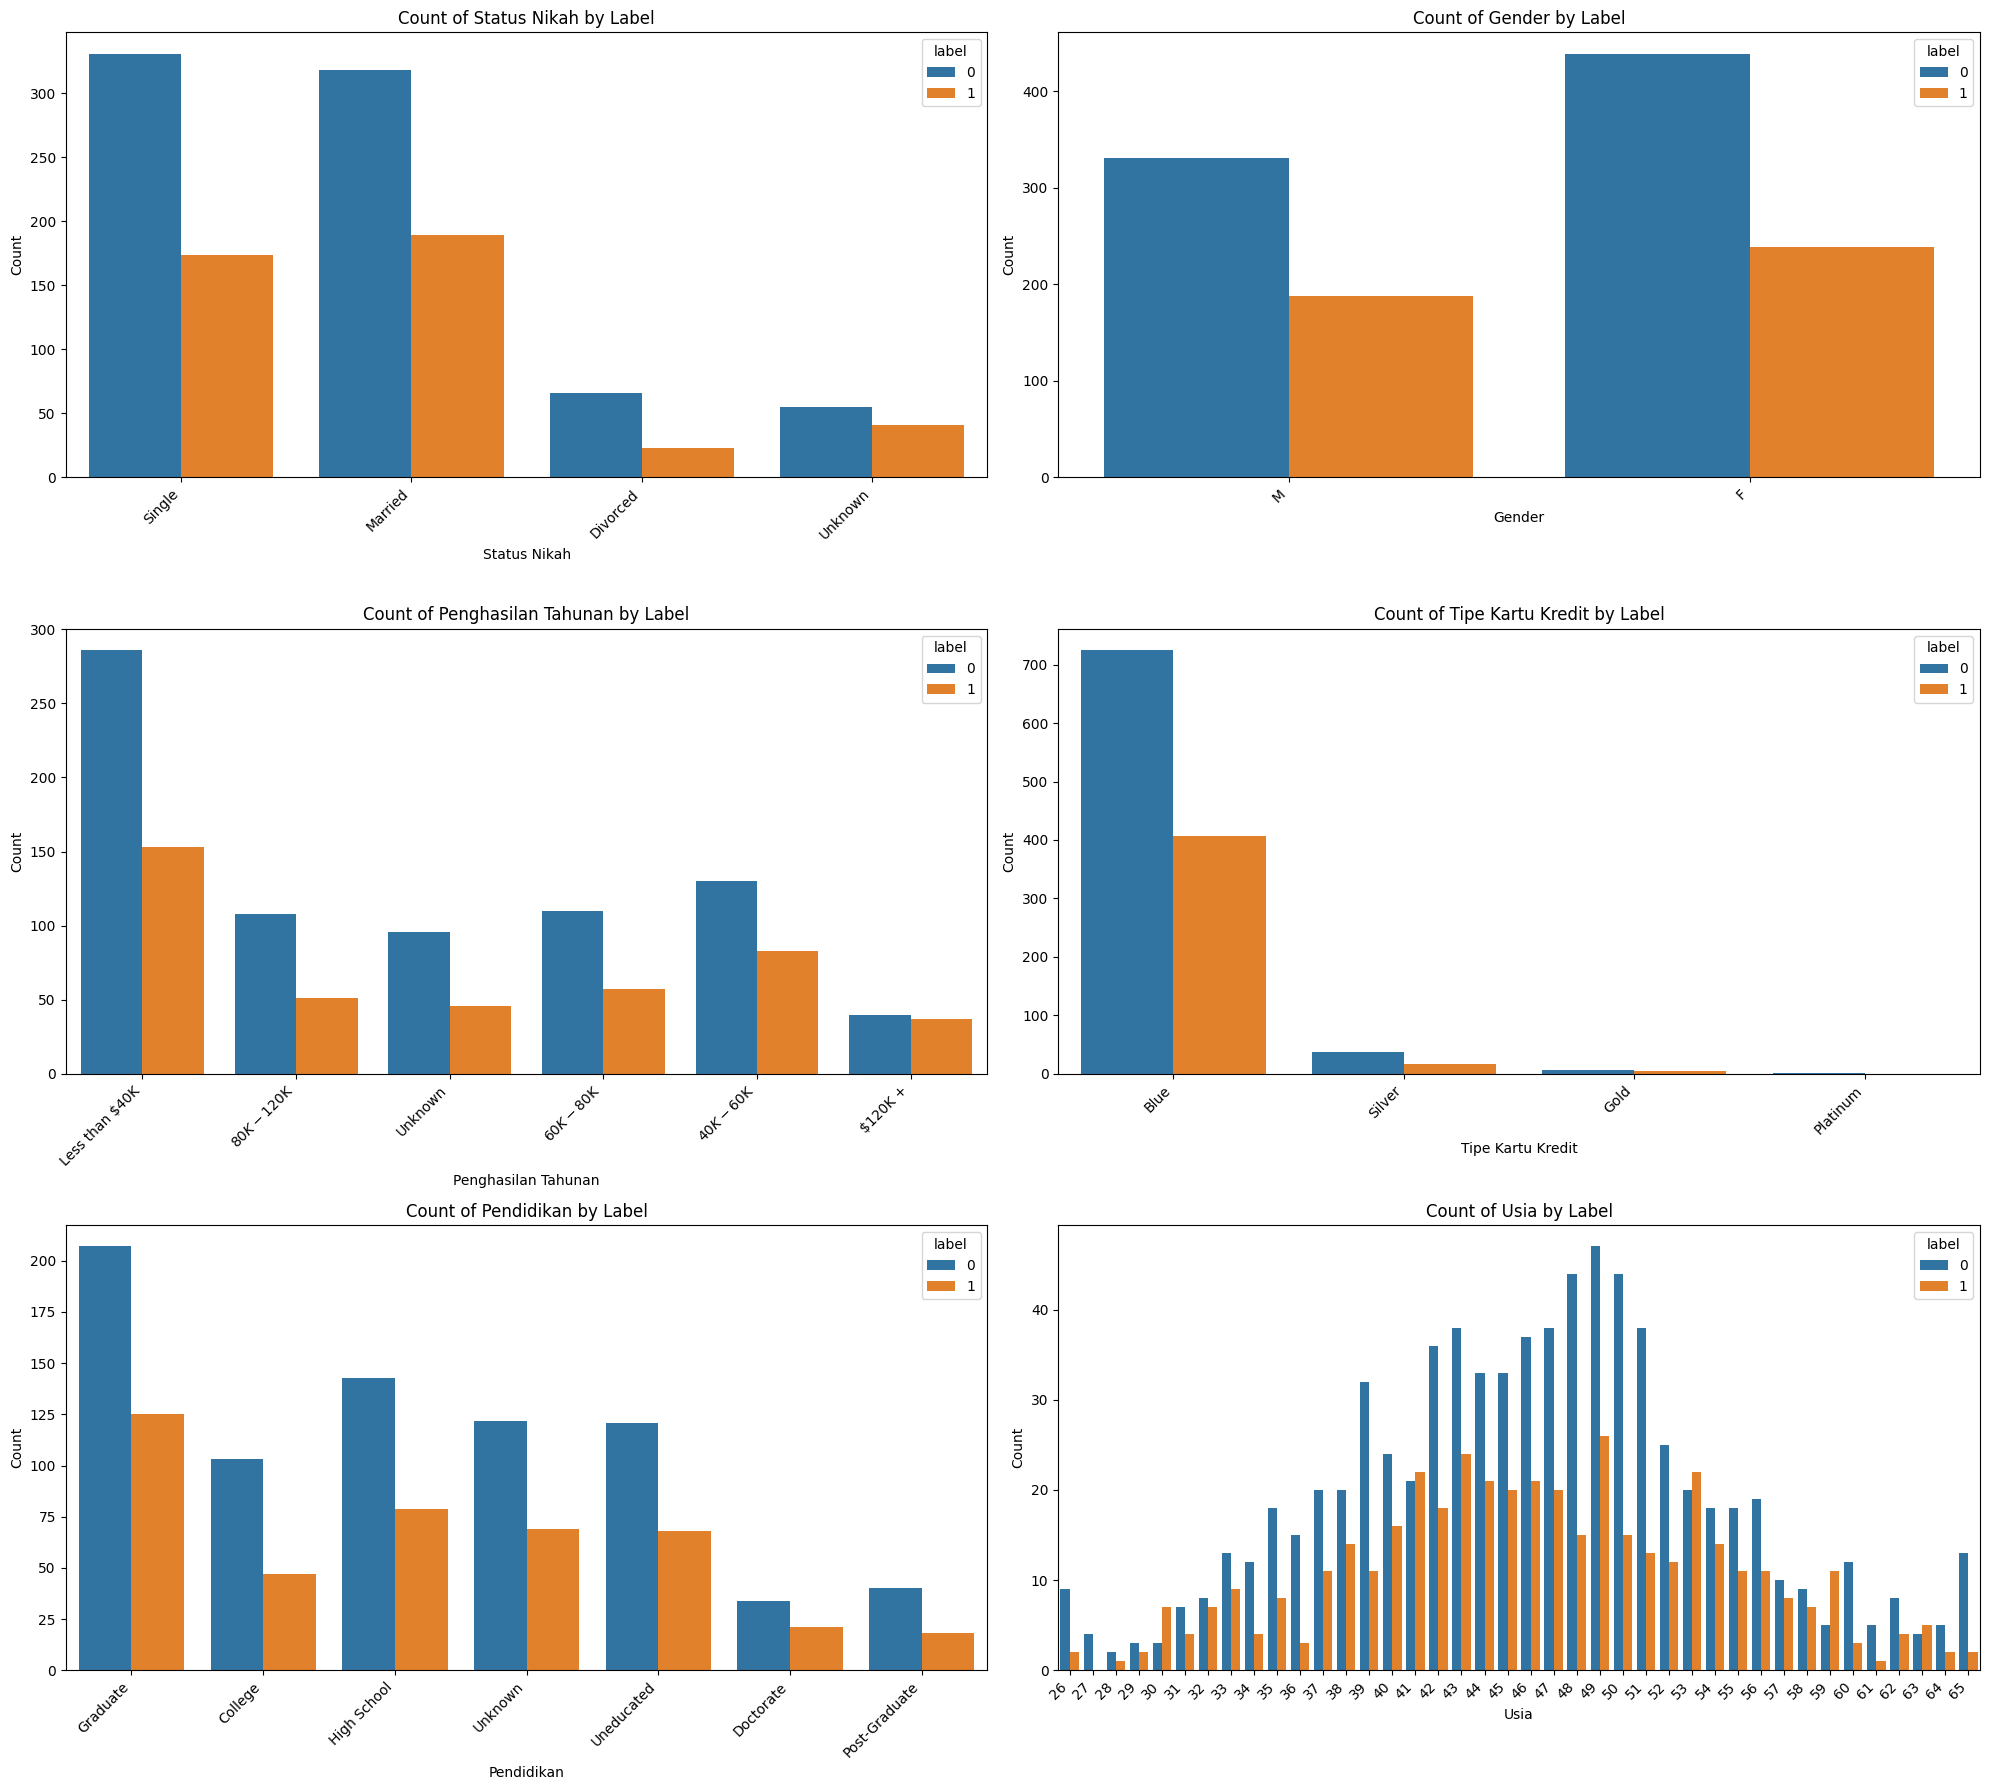

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
plot_count(axes[0, 0], filtered_data, 'status_nikah', 'label', 'Count of Status Nikah by Label', 'Status Nikah', 'Count')
plot_count(axes[0, 1], filtered_data, 'gender', 'label', 'Count of Gender by Label', 'Gender', 'Count')
plot_count(axes[1, 0], filtered_data, 'penghasilan_tahunan', 'label', 'Count of Penghasilan Tahunan by Label', 'Penghasilan Tahunan', 'Count')
plot_count(axes[1, 1], filtered_data, 'tipe_kartu_kredit', 'label', 'Count of Tipe Kartu Kredit by Label', 'Tipe Kartu Kredit', 'Count')
plot_count(axes[2, 0], filtered_data, 'pendidikan', 'label', 'Count of Pendidikan by Label', 'Pendidikan', 'Count')
plot_count(axes[2, 1], filtered_data, 'usia', 'label', 'Count of Usia by Label', 'Usia', 'Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

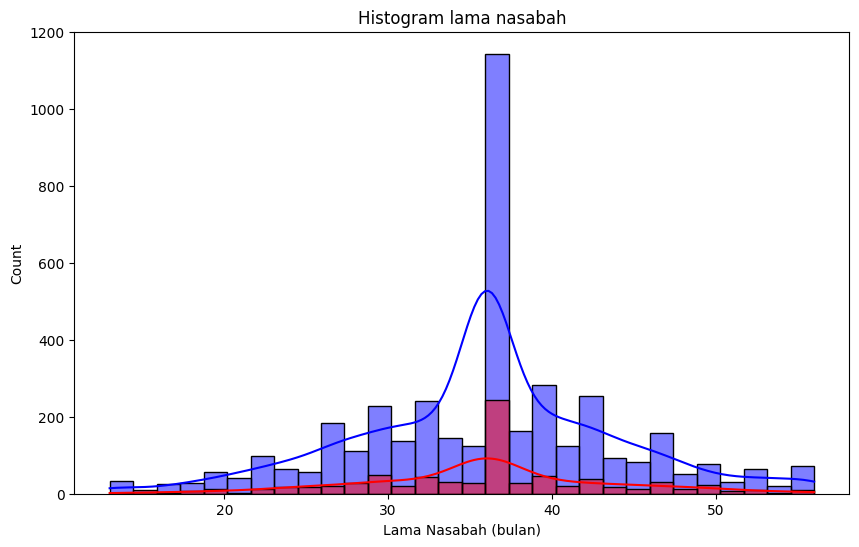

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 0]['lama_nasabah'],color = 'blue', kde=True, bins=30)
sns.histplot(df[df['label'] == 1]['lama_nasabah'], color = 'red',kde=True, bins=30)
plt.title('Histogram lama nasabah')
plt.xlabel('Lama Nasabah (bulan)')
plt.ylabel('Count')

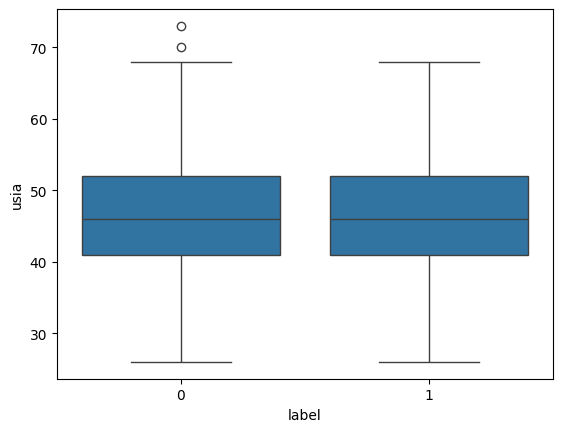

In [ ]:
sns.boxplot(x='label', y='usia', data=df)
plt.show()

*   Median usia untuk label 0 (no churn) dan label 1 (churn) berada sekitar usia 50 tahun.
*   Rentang usia di dalam kotak untuk kedua kelompok adalah dari sekitar 40 hingga 55 tahun.
*   Whiskers bawah pada label 0 hingga 30 tahun dan whiskers atas hingga 67 tahun begitu juga pada label 1.
*   Ada dua outliers pada label 0 (no churn) yang berada di atas usia 67 tahun, mendekati 70 tahun.








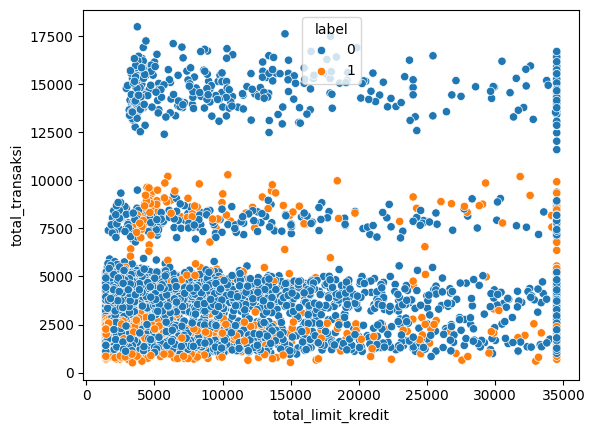

In [ ]:
sns.scatterplot(x='total_limit_kredit', y='total_transaksi', hue='label', data=df)
plt.show()

Scatter plot diatas menunjukkan dot oranye yang berkumpul di kiri bawah sehingga dapat disimpulkan bahwa dalam rentang 0 hingga 10000 pada total_transaksi pelanggan cenderung churn. Walaupun data condong ke kiri bawah namun tetap tersebar ke arah kanan dimana berarti total_limit_kredit bukan patokan yang pasti untuk memprediksi pelanggan churn.

**Apakah status pernikahan mempengaruhi churn?**

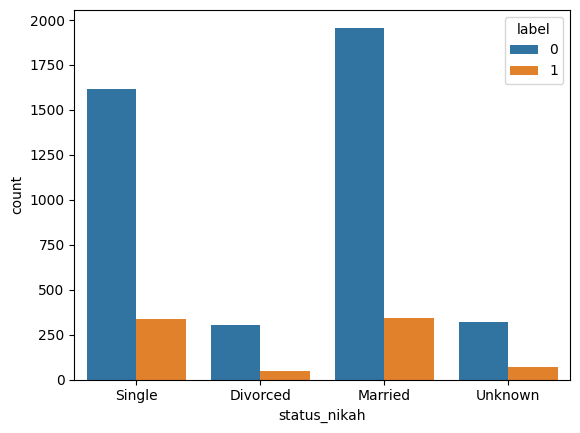

In [ ]:
sns.countplot(x='status_nikah', hue='label',data=df)
plt.show()

**Apakah ada perbedaan tingkat churn antara gender (laki-laki vs perempuan)?**

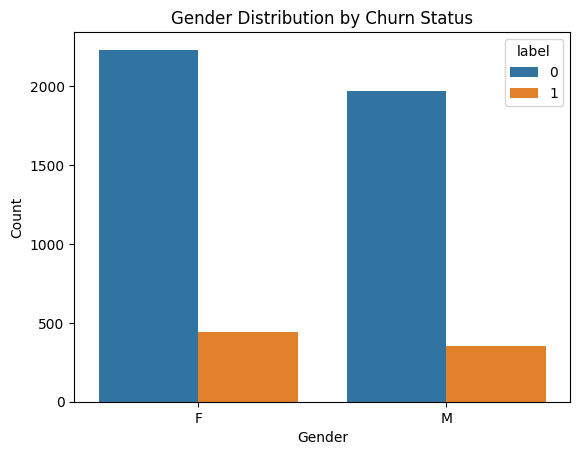

In [ ]:
sns.countplot(x='gender', hue='label', data=df)
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Apakah jumlah tanggungan mempengaruhi churn?**

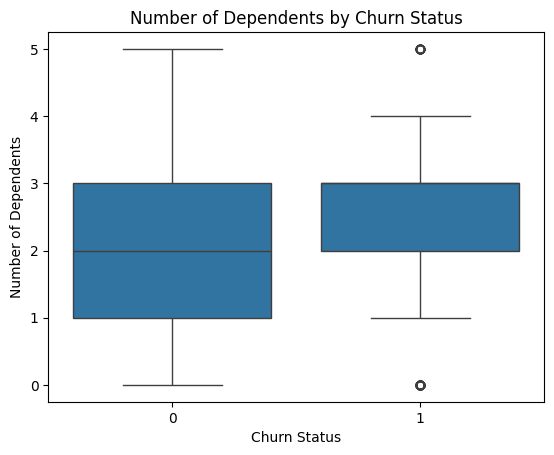

In [ ]:
sns.boxplot(x='label', y='jumlah_tanggungan', data=df)
plt.title('Number of Dependents by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Dependents')
plt.show()

**Pengaruh pendidikan**

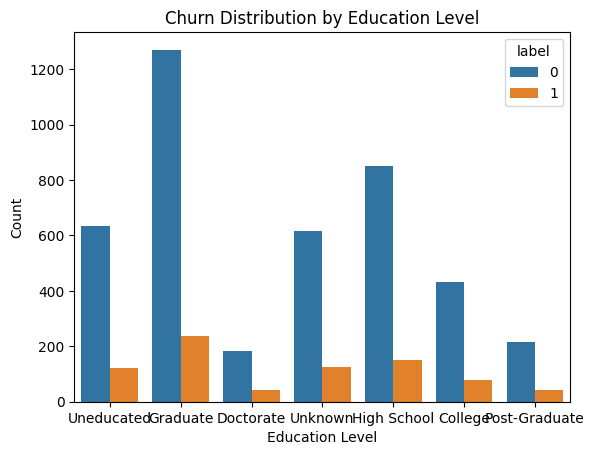

In [ ]:
sns.countplot(x='pendidikan', hue='label', data=df)
plt.title('Churn Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

**Pengaruh lama nasabah**

**Pengaruh total transaksi**

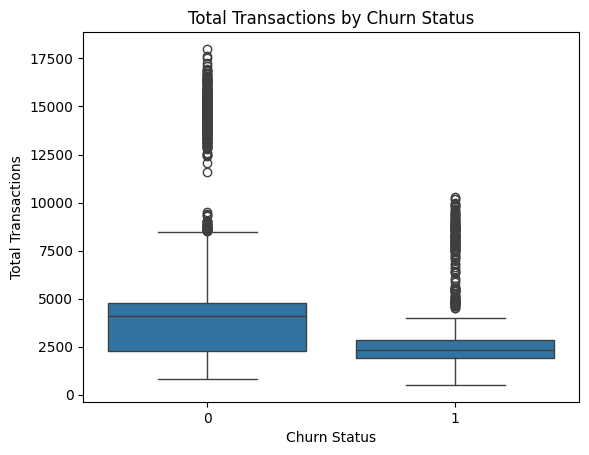

In [ ]:
sns.boxplot(x='label', y='total_transaksi', data=df)
plt.title('Total Transactions by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Transactions')
plt.show()

**Penghasilan tahunan**

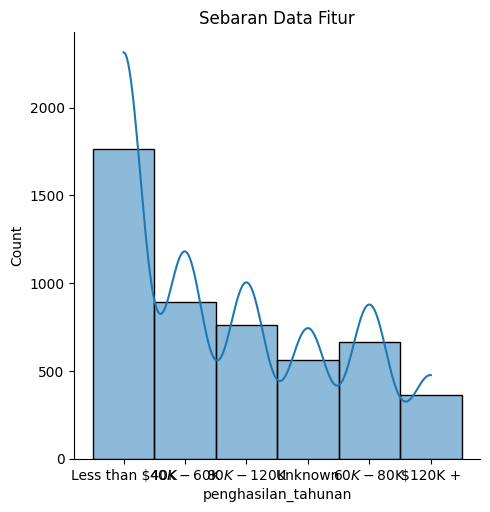

In [ ]:
sns.displot(df['penghasilan_tahunan'], kde=True)
plt.title('Sebaran Data Fitur')
plt.show()

Distribution Plot diatas menunjukkan bahwa pelanggan dengan penghasilan tahunan cenderung lebih banyak disekitar kurang dari $40k dan padat pada nilai penghasilan tertentu pada rentang tersebut berdasarkan KDE

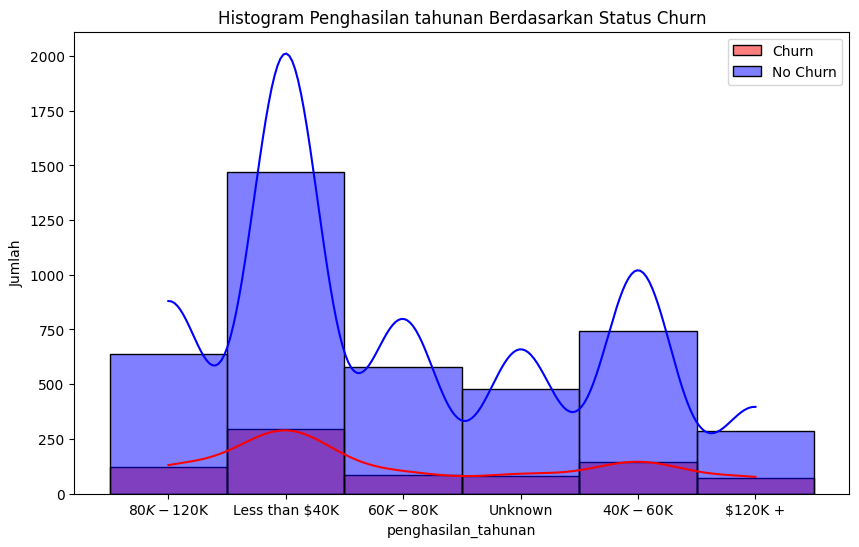

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 1]['penghasilan_tahunan'], kde=True, color='red', label='Churn', bins=30, alpha=0.5)
sns.histplot(df[df['label'] == 0]['penghasilan_tahunan'], kde=True, color='blue', label='No Churn', bins=30, alpha=0.5)
plt.title('Histogram Penghasilan tahunan Berdasarkan Status Churn')
plt.xlabel('penghasilan_tahunan')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

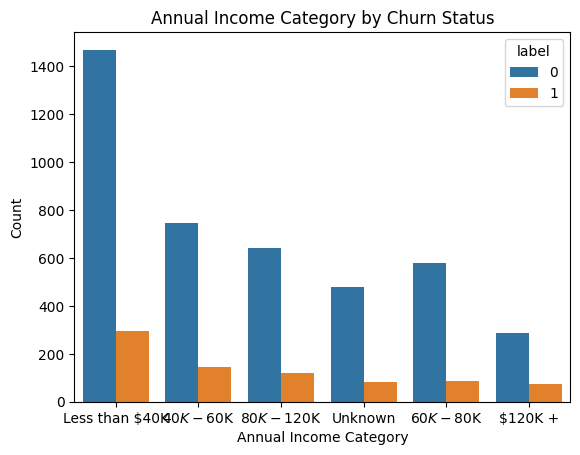

In [ ]:
sns.countplot(x='penghasilan_tahunan', hue='label', data=df)
plt.title('Annual Income Category by Churn Status')
plt.xlabel('Annual Income Category')
plt.ylabel('Count')
plt.show()

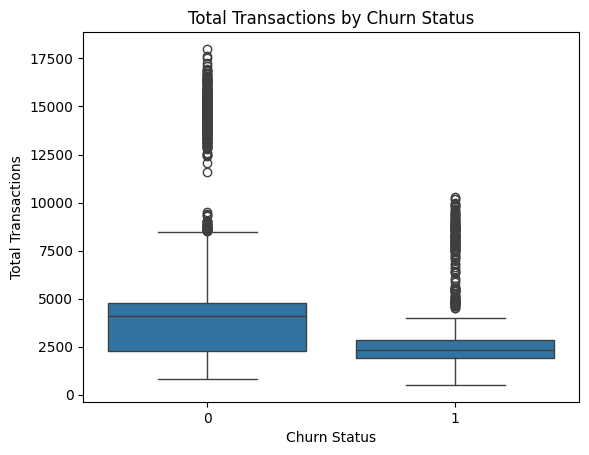

In [ ]:
sns.boxplot(x='label', y='total_transaksi', data=df)
plt.title('Total Transactions by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Transactions')
plt.show()


Median: Median total transaksi untuk customer yang tidak churn (0) lebih tinggi dibandingkan dengan customer yang churn (1). menunjukkan bahwa customer yang melakukan lebih banyak transaksi cenderung tidak churn.

Interquartile Range (IQR): IQR untuk customer yang tidak churn lebih besar daripada yang churn, menunjukkan bahwa variasi transaksi lebih besar di antara customer yang tidak churn.

Outlier: Ada banyak outlier di kedua kelompok, tetapi terutama pada customer yang tidak churn. menunjukkan bahwa ada beberapa customer yang melakukan transaksi dengan jumlah yang sangat tinggi.

Karena terlalu banyak outlier dari berbagai fitur, maka tidak akan dihapus karena status data tersebut tidak diketahui (bisa jadi penting) dan dikhawatirkan mengganggu distribusi data

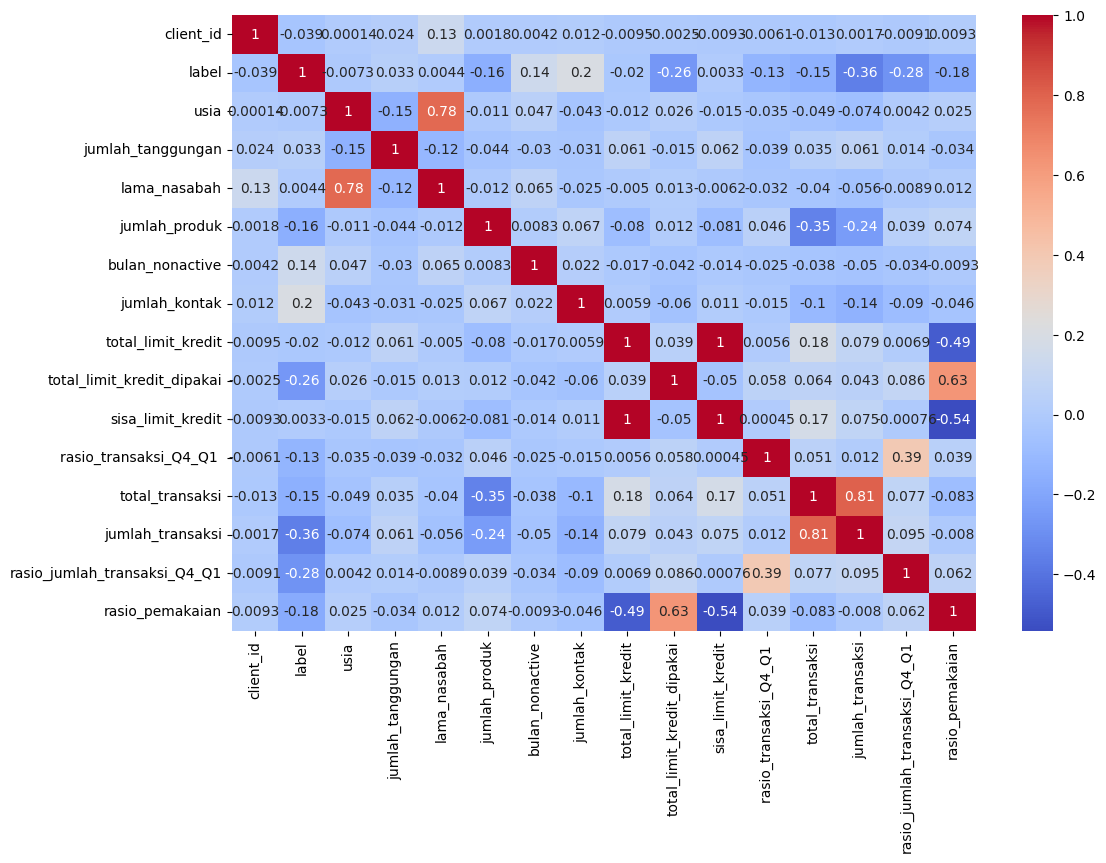

In [ ]:
num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm')
plt.show()

berdasarkan heatmap tersebut menunjukkan bahwa ada korelasi tinggi sebesar 0.81 pada total_transaksi dan jumlah_transaksi. dan 0.78 pada lama_nasabah dan usia



---


# **Feature engineering**

In [ ]:
df = df.drop(columns=['client_id'])

**Filterisasi**



---
# **Membuat Data Turununan**

In [ ]:
df['usia'].unique()

array([48, 59, 37, 47, 42, 65, 52, 58, 35, 38, 41, 49, 46, 50, 64, 43, 44,
       56, 54, 61, 39, 45, 36, 53, 63, 60, 51, 27, 32, 55, 34, 62, 40, 57,
       26, 33, 30, 66, 73, 31, 28, 29, 67, 70, 68])

In [ ]:
age_binning = [20, 35, 50, 75]
age_category = ['dewasa awal', 'dewasa tengah ','lansia']

df['kat_usia'] = pd.cut(df['usia'], bins = age_binning, labels=age_category)
df['kat_usia'] = df['kat_usia'].astype('object')
df.head(100)

,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,kat_usia
0,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,dewasa tengah
1,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,lansia
2,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,dewasa tengah
3,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,dewasa tengah
4,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,dewasa tengah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,46,M,4,Unknown,Divorced,$60K - $80K,Blue,32,5,3,3,1438.3,738,700.3,0.709,4368,87,0.740,0.513,dewasa tengah
96,1,36,F,3,Unknown,Single,Less than $40K,Blue,36,4,3,0,1558.0,261,1297.0,0.775,2424,40,0.600,0.168,dewasa tengah
97,0,38,F,2,Uneducated,Single,Less than $40K,Blue,32,5,3,3,2264.0,0,2264.0,0.479,1204,28,0.333,0.000,dewasa tengah
98,0,42,F,3,Uneducated,Married,Less than $40K,Blue,36,6,2,2,5821.0,0,5821.0,0.859,4591,70,1.188,0.000,dewasa tengah


Kategori usia mengikuti depkes

Rasio penghasilan tanggungan = penghasian pertahun/jumlah tanggungan

<ipython-input-58-2f9d7d32edb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kat_usia', data=df, palette='viridis')


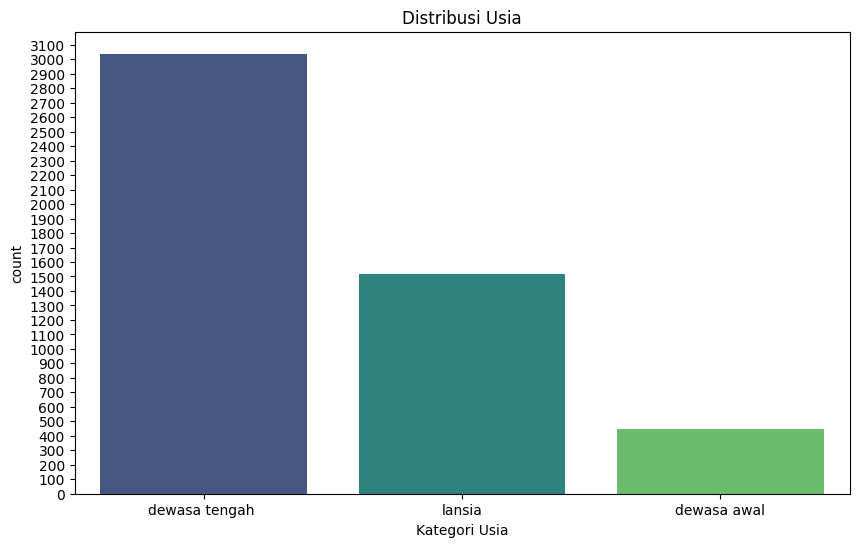

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='kat_usia', data=df, palette='viridis')
plt.title('Distribusi Usia')
plt.xlabel('Kategori Usia')
plt.yticks(range(0, df['kat_usia'].value_counts().max() + 100, 100))

plt.show()

In [ ]:
age_counts = df['kat_usia'].value_counts()

In [ ]:
age_counts

kat_usia
dewasa tengah     3038
lansia            1516
dewasa awal        446
Name: count, dtype: int64

In [ ]:
df['lama_thn_nasabah'] = df['lama_nasabah']/12
df.head()

,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,kat_usia,lama_thn_nasabah
0,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,dewasa tengah,3.250000
1,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,lansia,4.416667
2,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,dewasa tengah,3.000000
3,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,dewasa tengah,3.000000
4,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,dewasa tengah,2.750000


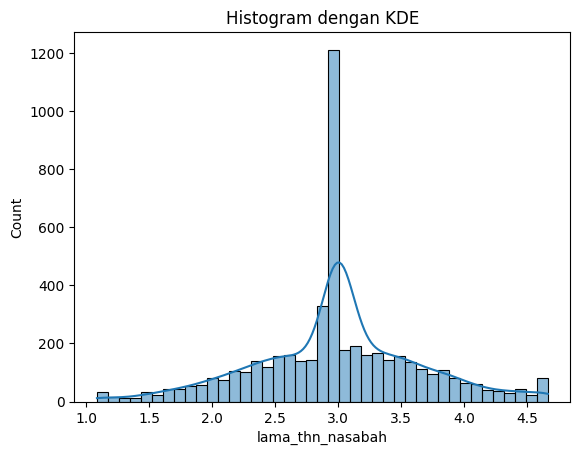

In [ ]:
sns.histplot(df['lama_thn_nasabah'],kde=True)
plt.title('Histogram dengan KDE')
plt.show()

Rata nominal pertransaksi

In [ ]:
df['rata_transaksi'] = df['total_transaksi']/df['jumlah_transaksi']
df.head()

,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,kat_usia,lama_thn_nasabah,rata_transaksi
0,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,dewasa tengah,3.250000,58.343750
1,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,lansia,4.416667,50.759494
2,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,dewasa tengah,3.000000,70.552239
3,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,dewasa tengah,3.000000,67.202703
4,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,dewasa tengah,2.750000,41.542857


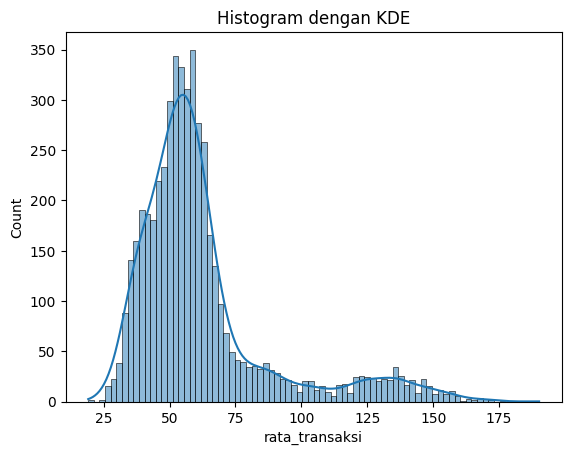

In [ ]:
sns.histplot(df['rata_transaksi'],kde=True)
plt.title('Histogram dengan KDE')
plt.show()

Rasio sisa limit kredit

In [ ]:
df['rasio_sisa_limit kredit']= df['sisa_limit_kredit']/df['total_limit_kredit']
df.head()

,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,kat_usia,lama_thn_nasabah,rata_transaksi,rasio_sisa_limit kredit
0,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,dewasa tengah,3.250000,58.343750,0.495821
1,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,lansia,4.416667,50.759494,0.284215
2,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,dewasa tengah,3.000000,70.552239,0.430796
3,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,dewasa tengah,3.000000,67.202703,0.683243
4,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,dewasa tengah,2.750000,41.542857,0.415724


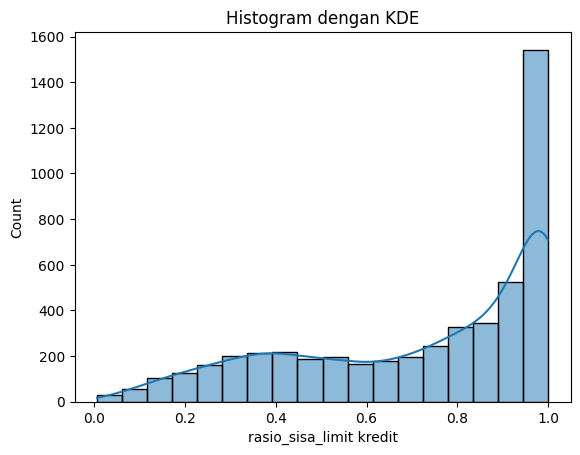

In [ ]:
sns.histplot(df['rasio_sisa_limit kredit'],kde=True)
plt.title('Histogram dengan KDE')
plt.show()

Scaling data usia, lama_nasabah, total_limit_kredit	total_limit_kredit_dipakai	sisa_limit_kredit, total_transaksi	jumlah_transaksi


---



# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

#df = df.dropna()
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# **Balancing Label**

In [ ]:
df.head(5)

,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,kat_usia,lama_thn_nasabah,rata_transaksi,rasio_sisa_limit kredit
0,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,dewasa tengah,3.250000,58.343750,0.495821
1,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,lansia,4.416667,50.759494,0.284215
2,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,dewasa tengah,3.000000,70.552239,0.430796
3,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,dewasa tengah,3.000000,67.202703,0.683243
4,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,dewasa tengah,2.750000,41.542857,0.415724


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN

In [ ]:
oversampler = SMOTENC(categorical_features=[1,3,4,5,6,19], sampling_strategy='auto', random_state=42)
X_train_smotenc,y_train_smotenc = oversampler.fit_resample(X_train,y_train)

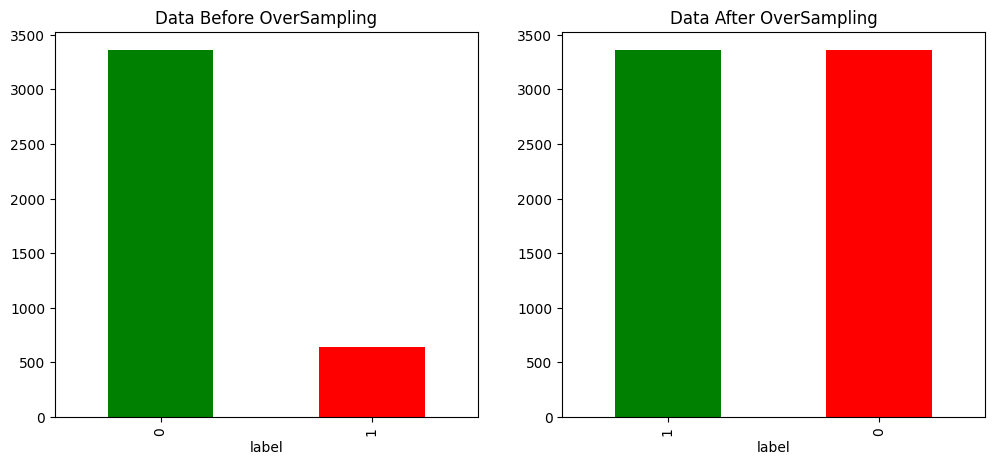

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(121)
y_train.value_counts().plot(kind='bar',color=['g','r'])
plt.title("Data Before OverSampling");
plt.subplot(122)
y_train_smotenc.value_counts().plot(kind='bar',color=['g','r'])
plt.title("Data After OverSampling");

In [ ]:
y_train_smotenc.value_counts()

label
1    3360
0    3360
Name: count, dtype: int64

# **Pipeline**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import  ColumnTransformer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
num_preprocessor = Pipeline([("num_scaler", PowerTransformer())])
cat_preprocessor = Pipeline([("cat_onehot", OneHotEncoder())])

num_columns = X_train.select_dtypes(include=np.number).columns
cat_columns = X_train.select_dtypes(exclude=np.number).columns

preprocess = ColumnTransformer([("num_pipe", num_preprocessor, num_columns),
                                ("cat_pipe", cat_preprocessor, cat_columns)])

gradB_pipeline = Pipeline([("preprocess_pipe",preprocess),
                             ("model", GradientBoostingClassifier())])

svc_pipeline = Pipeline([("preprocess_pipe",preprocess),
                             ("model", SVC(probability=True, random_state=42))])

set_config(display='diagram')


#xgb_pipeline
#gradB_pipeline
svc_pipeline

Pipeline(steps=[('preprocess_pipe',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num_scaler',
                                                                   PowerTransformer())]),
                                                  Index(['usia', 'jumlah_tanggungan', 'lama_nasabah', 'jumlah_produk',
       'bulan_nonactive', 'jumlah_kontak', 'total_limit_kredit',
       'total_limit_kredit_dipakai', 'sisa_limit_kredit',
       'rasio_transaksi_Q4_Q1 ', 'total_transaksi', 'jumlah_...
       'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian', 'lama_thn_nasabah',
       'rata_transaksi', 'rasio_sisa_limit kredit'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'kat_usia'],
      dtype='object'))])),
                ('model', SVC(probability=True, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
def classification_model_performance(model,X,y,label="Training"):
    print("Model Performance in Data",label)
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    print(classification_report(y,y_pred))
    print(f"Log Loss: {log_loss(y, y_pred_proba):.4f}")



---


# Gradient Boost

In [ ]:

tree_list = [10,15,20,25,50,100,200]
gboost_param = {
    'model__n_estimators' : tree_list,
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__subsample': [0.5, 0.7],
    'model__max_features' : [1,2,3,4,5,6]
}

gradB_random_search = RandomizedSearchCV(gradB_pipeline,
                                       gboost_param,
                                       cv=5,
                                       scoring='accuracy',
                                       error_score='raise',
                                       return_train_score=True)

gradB_random_search = gradB_random_search.fit(X_train_smotenc, y_train_smotenc)

print("Best set of hyperparameters for GBM: ", gradB_random_search.best_params_)
print("Best score for GBM: ", gradB_random_search.best_score_)

Best set of hyperparameters for GBM:  {'model__subsample': 0.7, 'model__n_estimators': 200, 'model__max_features': 6, 'model__learning_rate': 0.1}
Best score for GBM:  0.963095238095238


In [ ]:
classification_model_performance(gradB_random_search,X_train_smotenc,y_train_smotenc,"Training")
classification_model_performance(gradB_random_search,X_test,y_test,"Testing")

Model Performance in Data Training
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3360
           1       0.97      0.99      0.98      3360

    accuracy                           0.98      6720
   macro avg       0.98      0.98      0.98      6720
weighted avg       0.98      0.98      0.98      6720

Log Loss: 0.0793
Model Performance in Data Testing
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       840
           1       0.80      0.96      0.87       160

    accuracy                           0.95      1000
   macro avg       0.90      0.96      0.92      1000
weighted avg       0.96      0.95      0.96      1000

Log Loss: 0.1312


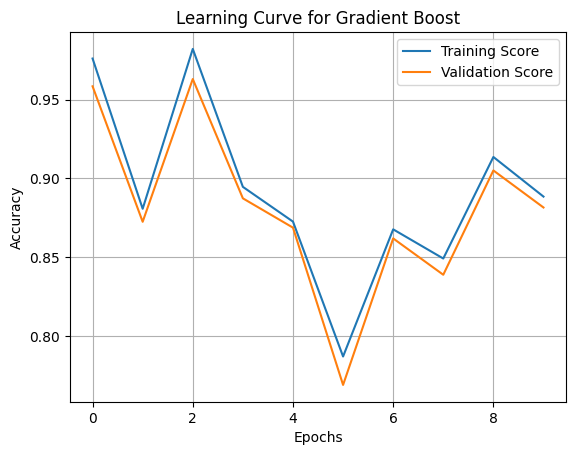

In [ ]:
# Extract training and validation scores
train_scores = gradB_random_search.cv_results_["mean_train_score"]
validation_scores = gradB_random_search.cv_results_["mean_test_score"]

# Create the plot
plt.plot(train_scores, label='Training Score')
plt.plot(validation_scores, label='Validation Score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Gradient Boost')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_prob = gradB_random_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)

AUC:  0.985


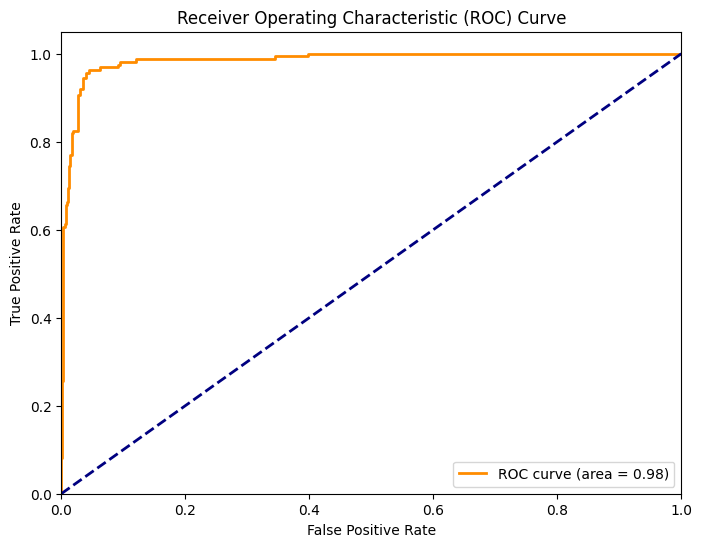

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SVM

In [ ]:
from scipy.stats import uniform
param_svm = {
    'model__C': [0.1],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

svc_random_search = GridSearchCV(svc_pipeline,
                                   param_svm,
                                   #n_iter=50,
                                   cv=5,
                                   #random_state=42,
                                   scoring='accuracy',
                                   error_score='raise',
                                   return_train_score=True)
svc_random_search = svc_random_search.fit(X_train_smotenc, y_train_smotenc)

print("Best set of hyperparameters for svc: ", svc_random_search.best_params_)
print("Best score for svc: ", svc_random_search.best_score_)

Best set of hyperparameters for svc:  {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best score for svc:  0.9172619047619047


In [ ]:
classification_model_performance(svc_random_search,X_train_smotenc,y_train_smotenc,"Training")
classification_model_performance(svc_random_search,X_test,y_test,"Testing")

Model Performance in Data Training
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3360
           1       0.92      0.94      0.93      3360

    accuracy                           0.93      6720
   macro avg       0.93      0.93      0.93      6720
weighted avg       0.93      0.93      0.93      6720

Log Loss: 0.1878
Model Performance in Data Testing
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       840
           1       0.67      0.81      0.73       160

    accuracy                           0.91      1000
   macro avg       0.82      0.87      0.84      1000
weighted avg       0.92      0.91      0.91      1000

Log Loss: 0.2765


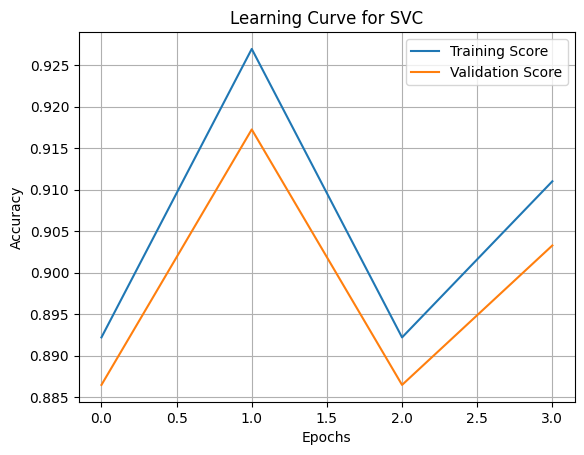

In [ ]:
# Extract training and validation scores
train_scores = svc_random_search.cv_results_["mean_train_score"]
validation_scores = svc_random_search.cv_results_["mean_test_score"]

# Create the plot
plt.plot(train_scores, label='Training Score')
plt.plot(validation_scores, label='Validation Score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_prob = svc_random_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)


AUC:  0.939203869047619


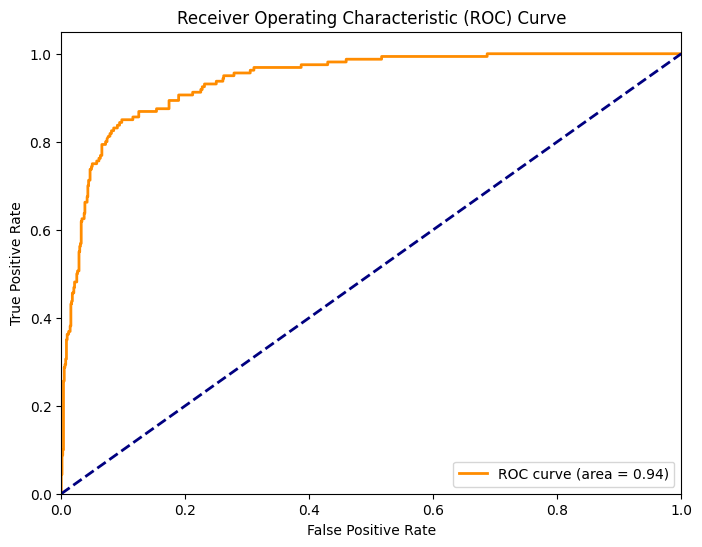

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()